In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../Resources/Raw Data/HUD_grantee_awards_2005-2022.csv", skiprows=3)
df.head()



,Year,State,CoC Name,Org Name,Program Name,Program Type,Award Amount
0,2022,AK,AK-501 - Alaska Balance of State CoC,Alaska Housing Finance Corporation,CoC,AK-501 - Special NOFO - Prince of Wales Island...,148995
1,2022,AZ,AZ-500 - Arizona Balance of State CoC,Arizona Department of Housing,CoC,AZ-500 - Special NOFO - RE:center Rural Set As...,355000
2,2022,AZ,AZ-500 - Arizona Balance of State CoC,Arizona Department of Housing,CoC,AZ-500 - Special NOFO - Gila County Rural Set ...,355000
3,2022,AZ,AZ-501 - Tucson/Pima County CoC,City of Tucson,CoC,AZ-501 - Special NOFO - FY22 Tucson Multi-Disc...,1115271
4,2022,AZ,AZ-501 - Tucson/Pima County CoC,City of Tucson,CoC,AZ-501 - Special NOFO - CBI Pima PSH 76,3079482


In [4]:
df.tail()

,Year,State,CoC Name,Org Name,Program Name,Program Type,Award Amount
118586,2005,WV,WV-508 - West Virginia Balance of State CoC,NaN,CoC,SHP - Telamon Corporation,28071
118587,2005,WV,WV-508 - West Virginia Balance of State CoC,NaN,CoC,SHPR - Telamon Corporation,210627
118588,2005,WV,WV-508 - West Virginia Balance of State CoC,NaN,CoC,SHP - Westbrook Health Services,65256
118589,2005,WV,WV-508 - West Virginia Balance of State CoC,NaN,CoC,SHP - Worthington Mental Health Services,301920
118590,2005,WY,WY-500 - Wyoming Statewide CoC,NaN,CoC,SHPR - Council of Community Services,61016


In [3]:
len(df)

118591

In [5]:
new_vie_df = df[~df['State'].isin(['MP', 'AS', 'PR', 'VI', 'GU', 'AK', 'DC', 'HI'])]

In [6]:
new_vie_df.tail()

,Year,State,CoC Name,Org Name,Program Name,Program Type,Award Amount
118586,2005,WV,WV-508 - West Virginia Balance of State CoC,NaN,CoC,SHP - Telamon Corporation,28071
118587,2005,WV,WV-508 - West Virginia Balance of State CoC,NaN,CoC,SHPR - Telamon Corporation,210627
118588,2005,WV,WV-508 - West Virginia Balance of State CoC,NaN,CoC,SHP - Westbrook Health Services,65256
118589,2005,WV,WV-508 - West Virginia Balance of State CoC,NaN,CoC,SHP - Worthington Mental Health Services,301920
118590,2005,WY,WY-500 - Wyoming Statewide CoC,NaN,CoC,SHPR - Council of Community Services,61016


In [7]:
df.tail()

,Year,State,CoC Name,Org Name,Program Name,Program Type,Award Amount
118586,2005,WV,WV-508 - West Virginia Balance of State CoC,NaN,CoC,SHP - Telamon Corporation,28071
118587,2005,WV,WV-508 - West Virginia Balance of State CoC,NaN,CoC,SHPR - Telamon Corporation,210627
118588,2005,WV,WV-508 - West Virginia Balance of State CoC,NaN,CoC,SHP - Westbrook Health Services,65256
118589,2005,WV,WV-508 - West Virginia Balance of State CoC,NaN,CoC,SHP - Worthington Mental Health Services,301920
118590,2005,WY,WY-500 - Wyoming Statewide CoC,NaN,CoC,SHPR - Council of Community Services,61016


In [8]:
new_df = df[['Year', 'State', 'Award Amount']]

new_df = new_df.reset_index(drop=True)
new_df.tail()

,Year,State,Award Amount
118586,2005,WV,28071
118587,2005,WV,210627
118588,2005,WV,65256
118589,2005,WV,301920
118590,2005,WY,61016


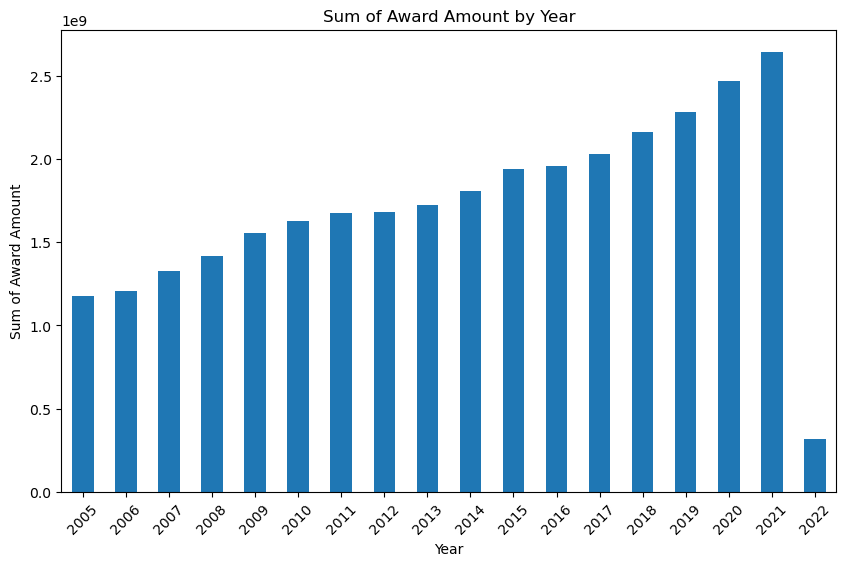

In [9]:
import matplotlib.pyplot as plt

award_sum_by_year = new_df.groupby('Year')['Award Amount'].sum()

award_sum_by_year.plot(kind='bar', figsize=(10, 6))
plt.title('Sum of Award Amount by Year')
plt.xlabel('Year')
plt.ylabel('Sum of Award Amount')
plt.xticks(rotation=45)
plt.show()

In [10]:
funding_2022 = pd.read_excel("../Resources/Raw Data/All-States-2022-Funding-Report.xlsx", engine='openpyxl')

In [11]:
funding_2022.head()

,State,CoC Number,CoC Name,Organization Name,Project or Award Name,FY 2022 Amount
0,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...","AIDS Alabama, Inc.",Ascension Renewal FY2022,833303
1,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...","AIDS Alabama, Inc.",Le Transclusive Expansion FY2022,656299
2,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...","AIDS Alabama, Inc.",Le Transclusive Renewal FY2022,452120
3,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...","AIDS Alabama, Inc.",Way Station TH/RRH Renewal FY2022,284588
4,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...","First Light, Inc.",Fourth Floor Renewal 2022,117915


In [12]:
len(funding_2022)

6982

In [13]:
us_territories = [
    "Puerto Rico", "Guam", "U.S. Virgin Islands", "American Samoa", 
    "Northern Mariana Islands", "American Samoa", "Northern Mariana Islands"
]
new_2022_funding = funding_2022[~funding_2022['State'].isin(us_territories)]

In [14]:
len(new_2022_funding)

6901

In [15]:
import us
for index, row in new_2022_funding.iterrows():
    state_abbr = us.states.lookup(row['State'])
    
    if state_abbr:
        new_2022_funding.at[index, 'State'] = state_abbr.abbr

In [17]:
new_2022_funding.tail()

,State,CoC Number,CoC Name,Organization Name,Project or Award Name,FY 2022 Amount
6977,WY,WY-500,Wyoming Statewide CoC,Institute for Community Alliances,WY Coordinated Entry Technical Assistance 2022,110440
6978,WY,WY-500,Wyoming Statewide CoC,Institute for Community Alliances,WY HMIS Project 2022,66885
6979,WY,WY-500,Wyoming Statewide CoC,Wyoming Homeless Collaborative,WY-500 Planning Grant 2022,40120
6980,WY,WY-500,Wyoming Statewide CoC,"Youth Emergency Services, Inc.",YHDP CE 2022 renewal,15000
6981,WY,WY-500,Wyoming Statewide CoC,"Youth Emergency Services, Inc.",YHDP renewal grant project FY2022,471669


In [20]:
cleaned_2022 = new_2022_funding[['State', 'FY 2022 Amount']]
cleaned_2022.head()
cleaned_2022['Year'] = 2022
cleaned_2022

C:\Users\scott_p9qjqkt\AppData\Local\Temp\ipykernel_26500\1456282150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_2022['Year'] = 2022


,State,FY 2022 Amount,Year
0,AL,833303,2022
1,AL,656299,2022
2,AL,452120,2022
3,AL,284588,2022
4,AL,117915,2022
...,...,...,...
6977,WY,110440,2022
6978,WY,66885,2022
6979,WY,40120,2022
6980,WY,15000,2022


In [24]:
cleaned_2022 = cleaned_2022.rename(columns={'FY 2022 Amount': 'Award Amount'})
cleaned_2022 = cleaned_2022[['Year', 'State', 'Award Amount']]

In [25]:
new_df

,Year,State,Award Amount
0,2022,AK,148995
1,2022,AZ,355000
2,2022,AZ,355000
3,2022,AZ,1115271
4,2022,AZ,3079482
...,...,...,...
118586,2005,WV,28071
118587,2005,WV,210627
118588,2005,WV,65256
118589,2005,WV,301920


In [26]:
cleaned_2022

,Year,State,Award Amount
0,2022,AL,833303
1,2022,AL,656299
2,2022,AL,452120
3,2022,AL,284588
4,2022,AL,117915
...,...,...,...
6977,2022,WY,110440
6978,2022,WY,66885
6979,2022,WY,40120
6980,2022,WY,15000


In [29]:
combined_df = new_df.copy()
combined_df = combined_df[combined_df['Year'] != 2022]
combined_df = pd.concat([combined_df, cleaned_2022], ignore_index=True)

In [35]:
combined_df = combined_df.sort_values(by=['Year', 'State'], ascending=[False, True]).reset_index(drop=True)

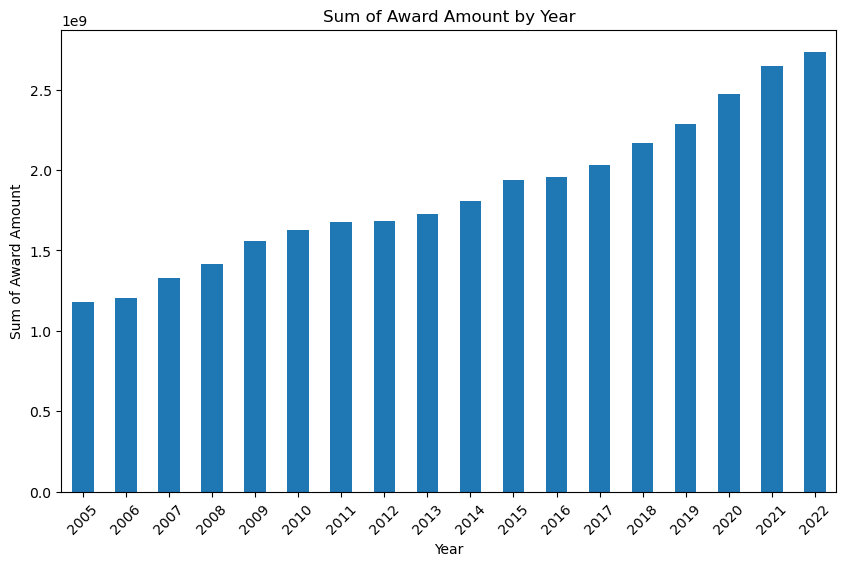

In [39]:
award_sum_by_year = combined_df.groupby('Year')['Award Amount'].sum()

# Plotting
award_sum_by_year.plot(kind='bar', figsize=(10, 6))
plt.title('Sum of Award Amount by Year')
plt.xlabel('Year')
plt.ylabel('Sum of Award Amount')
plt.xticks(rotation=45)
plt.show()